# Gravitational orbits in Cartesian coordinates
Gravity is real simple until you stop ignoring most of it

Normally you would only consider the force of gravity as mass times ~9.8 m/s. However this is assuming you're on earth, and that you are quite a bit smaller than the earth. And by "on" earth I mean it! The equation for gravity is more like
$\begin{align}
    g = \frac{GM}{R^2}
\end{align}$

So in reality the force of gravity is 
$\begin{align}
    {f} = \frac{GMm}{R^2}
\end{align}$

But what is the force between 2 objects that influence eachother?

$\begin{align}
    {f} = - G \frac{m_1m_2}{|r|^3}(r_1 -  r_2)
\end{align}$

This is the overall force caused by two objects onto eachother. The |r|^3 is the magnitude of their distance cubes, dividing their displacement which creates a vector pointing toward eachother with a |r|^2 factor on the bottom. Which is more like the 2nd equation above.

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
class GravitationalOrbits():
    """
    This class implements the parameters and Lagrange's equations for two bodies orbiting under gravitational attraction.
    
    Parameters
    ----------
    m_1 : float
        mass of the first object
    m_2 : float
        mass of the second object
    G : float
        the gravitational constant
        
    Methods
    -------
    dz_dt(t,z)
        Returns the right side of the differential equation for a given time t and the corresponding value of z.
    """
    def __init__(self,m_1=1.,m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
    
    def dz_dt(self,t,z):
        """
        This function returns the right-hand side of the diffeq:
        {dz/dt d^2z/dt^2}
        
        Parameters
        ----------
        t : float
            time
        z : float
            an 8-component vector with
                z[0] = x_1(t), z[1] = x_dot_1(t)
                z[2] = y_1(t), z[3] = y_dot_1(t)
                z[4] = x_2(t), z[5] = x_dot_2(t)
                z[6] = y_2(t), z[7] = y_dot_2(t)
                
        Returns
        -------
                
        """
        # magnitude of the distance between objects 1 and 2
        r_12 = np.sqrt( ( (z[0] - z[4])**2 + (z[2] - z[6])**2 ) )
        return [ z[1], self.G * self.m_2 * (z[4]-z[0]) / r_12**3,z[3],self.G*self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G*self.m_1 * (z[4] - z[0]) / r_12 **3, z[7], -self.G * self.m_1 * (z[6]-z[2]) / r_12**3]
    
    
    def solve_ode(self,t_pts,z_0,
                 abserr=1.0e-8,relerr=1.0e-8):
        """
                Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),
                             z_0, t_eval=t_pts,method='RK23',
                             atol = abserr, rtol = relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog(self,t_pts,z_0):
        """
        Solve the ODE using the leapfrog method
        """
        delta_t = t_pts[1] - t_pts[0]
        
        #initialize the zeroes
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
        
        #initialize the arrays with 0
        num_t_pts = len(t_pts)
        
        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        y_2 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        #starting values
        x_1[0] = x_1_0
        x_dot_1[0] = x_dot_1_0
        
        y_1[0] = y_1_0
        y_dot_1[0] = y_dot_1_0
        
        x_2[0] = x_2_0
        x_dot_2[0] = x_dot_2_0
        
        y_2[0] = y_2_0
        y_dot_2[0] = y_dot_2_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x_1[i], x_dot_1[i], y_1[i], y_dot_1[1], x_2[i], x_dot_2[i], y_2[i], y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1_half[i] = x_dot_1[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_dot_1_half[i] * delta_t
            
            y_dot_1_half[i] = y_dot_1[i] + out[3] * delta_t/2.
            y_1[i+1] = y_1[i] + y_dot_1_half[i] * delta_t
            
            x_dot_2_half[i] = x_dot_2[i] + out[5] * delta_t/2.
            x_2[i+1] = x_2[i] + x_dot_2_half[i] * delta_t
            
            y_dot_2_half[i] = y_dot_2[i] + out[7] * delta_t/2.
            y_2[i+1] = y_2[i] + y_dot_2_half[i] * delta_t
            
            #next point so the velocity can be found
            z = [x_1[i+1], x_dot_1, y_1[i+1], y_dot_1[i], x_2[i+1], x_dot_2[i], y_2[i+1], y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1[i+1] = x_dot_1_half[i] + out[1] *delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + out[3] *delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + out[5] *delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + out[7] *delta_t/2.
            
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## First up is the generic orbit with these equations

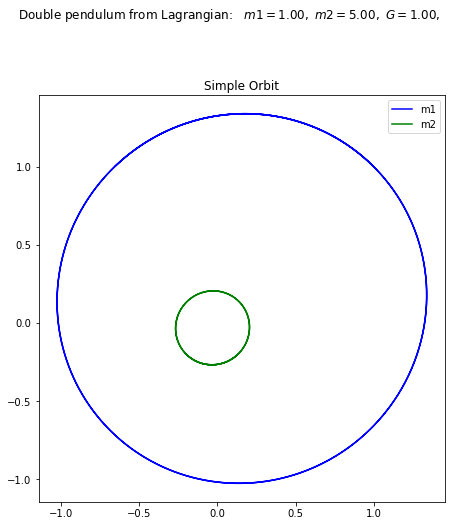

In [5]:
#Labels for individuals plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#input values
m1 = 1.
m2 = 5.
G = 1.

g1 = GravitationalOrbits(m1,m2,G)

#initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
# these values are choosen so that the orbit functions at all
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = g1.solve_ode(t_pts,z_0)

# start the plot!
fig = plt.figure(figsize=(7,7))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $m1 = {m1:.2f},$' + \
                rf' $m2 = {m2:.2f},$' + \
                rf' $G = {G:.2f},$'  + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end) 
ax_a.plot(x_1,y_1,color='blue', label = r'm1')
ax_a.plot(x_2,y_2,color='green',label = r'm2')
ax_a.set_title('Simple Orbit')
ax_a.legend()
ax_a.set_aspect(1)

fig.tight_layout()

Here you can see the two objects in their stable orbit of eachother.

### Next is to show that with one sufficiently heavier than the other that they behave more like one stationary body and 1 orbiting body

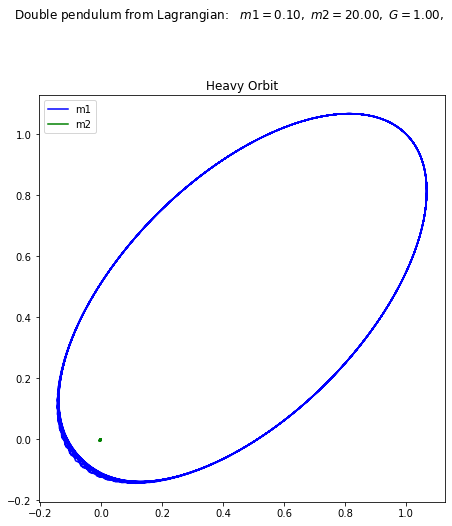

In [6]:
#Labels for individuals plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#input values
m1 = .1
m2 = 20.
G = 1.

g1 = GravitationalOrbits(m1,m2,G)

#initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
# these values are choosen so that the orbit functions at all
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = g1.solve_ode(t_pts,z_0)

# start the plot!
fig = plt.figure(figsize=(7,7))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $m1 = {m1:.2f},$' + \
                rf' $m2 = {m2:.2f},$' + \
                rf' $G = {G:.2f},$'  + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end) 
ax_a.plot(x_1,y_1,color='blue', label = r'm1')
ax_a.plot(x_2,y_2,color='green',label = r'm2')
ax_a.set_title('Heavy Orbit')
ax_a.legend()
ax_a.set_aspect(1)

fig.tight_layout()

You can see here with one mass 200 times larger than the other, the larger mass moves barely at all while the smaller mass orbits around it elliptically.

# Leapfrog method vs Regular solve_ivp

It is known from a previous homework that the leapfrog method greatly reduces error, and I will attempt to show that it does as such
Noteably, this causes the solve_ivp to loose energy while the leapfrog does not.

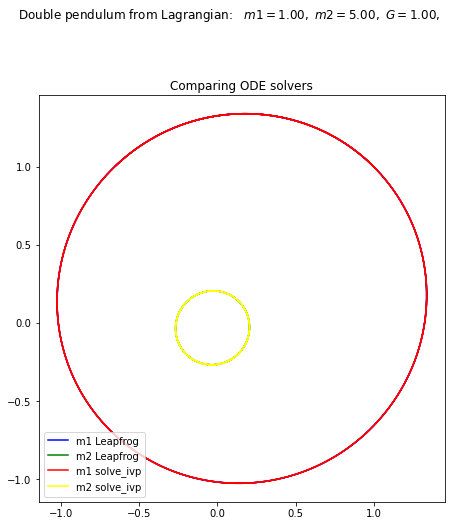

In [7]:
#Labels for individuals plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#input values
m1 = 1.
m2 = 5.
G = 1.

g1 = GravitationalOrbits(m1,m2,G)

#initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
# these values are choosen so that the orbit functions at all
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = g1.solve_ode_Leapfrog(t_pts,z_0)
x_1a, x_dot_1a, y_1a, y_dot_1a, x_2a, x_dot_2a, y_2a, y_dot_2a = g1.solve_ode(t_pts,z_0)

# start the plot!
fig = plt.figure(figsize=(7,7))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $m1 = {m1:.2f},$' + \
                rf' $m2 = {m2:.2f},$' + \
                rf' $G = {G:.2f},$'  + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end) 
ax_a.plot(x_1,y_1,color='blue', label = r'm1 Leapfrog')
ax_a.plot(x_2,y_2,color='green',label = r'm2 Leapfrog')
ax_a.plot(x_1a,y_1a,color='red', label = r'm1 solve_ivp')
ax_a.plot(x_2a,y_2a,color='yellow',label = r'm2 solve_ivp')
ax_a.set_title('Comparing ODE solvers')
ax_a.legend()
ax_a.set_aspect(1)

fig.tight_layout()

In a simple case you can see that they result in the same conditions of the two bodies orbiting eachother. However, next I will do a more massive m2 to show what happens to the energy of the system.

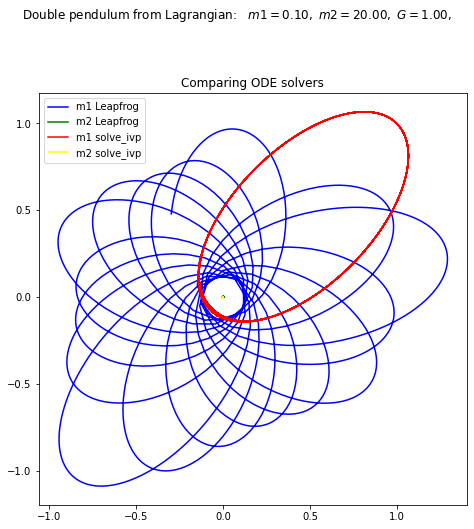

In [8]:
#Labels for individuals plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#input values
m1 = .1
m2 = 20.
G = 1.

g1 = GravitationalOrbits(m1,m2,G)

#initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
# these values are choosen so that the orbit functions at all
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = g1.solve_ode_Leapfrog(t_pts,z_0)
x_1a, x_dot_1a, y_1a, y_dot_1a, x_2a, x_dot_2a, y_2a, y_dot_2a = g1.solve_ode(t_pts,z_0)

# start the plot!
fig = plt.figure(figsize=(7,7))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $m1 = {m1:.2f},$' + \
                rf' $m2 = {m2:.2f},$' + \
                rf' $G = {G:.2f},$'  + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end) 
ax_a.plot(x_1,y_1,color='blue', label = r'm1 Leapfrog')
ax_a.plot(x_2,y_2,color='green',label = r'm2 Leapfrog')
ax_a.plot(x_1a,y_1a,color='red', label = r'm1 solve_ivp')
ax_a.plot(x_2a,y_2a,color='yellow',label = r'm2 solve_ivp')
ax_a.set_title('Comparing ODE solvers')
ax_a.legend()
ax_a.set_aspect(1)

fig.tight_layout()

So this shows that while the solve_ivp has a stable orbit, the leapfrog does not and results in a massive sprialing orbit. Why could this be? Well a stable orbit has negative energy which is why the orbiting body doesn't escape to infinity. However, the Leapfrog method shows that the system shouldn't result in a stable orbit and it is only happening due to the solve_ivp loosing the systems energy. The crazy spiral pattern has more total energy in its system which is why it can do such wild movements. 

Im certain that with enough time you could find an orbit that is table for the leapfrog method, but decays into colliding together for the solve_ivp method. However, I could not find it. 